In [1]:
from modsim import *
from numpy import *
%matplotlib notebook

"""This is our starting condition. This holds all of our constants and initial conditions."""
condition = Condition(angle = 50, #in degrees
                     mass = .0027, #in kilograms
                     diameter = .04, #in meters 
                     rho = 1.16, #air density in kg/m^3
                     C_d = .445, #unitless
                     cannon_length = .91,
                     velocity = 90,
                     duration = 20,
                     g=9.81,
                     omega = 0.00024) #meters

"""This function will make our system with all of a state that contains all of the initial conditions."""
def make_system(condition):
    unpack(condition)
    theta = np.deg2rad(angle)
    vx, vy = pol2cart(theta, velocity)
    x, y = pol2cart(theta, cannon_length)
    init = State(x=x, y=y, vx=vx, vy=vy)
    area = np.pi * (diameter/2)**2
    ts = linspace(0, duration, 101)
    return System(init=init, g=g, mass=mass,
        area=area, rho=rho, C_d=C_d, ts=ts, omega=omega)

"""This function will calculate the derivatives of everything changning in our state."""
def slope_func(state,t,system):
    
    x,y,vx,vy = state
    unpack(system)
    
    v=Vector(vx,vy)
    
    a_grav = Vector(0,-g) #turning gravity into a vector
    a_drag = (-rho*v.mag*v*C_d*area/2)/mass #calculating acceleration due to drag
   
    
    a_magnus_mag = (abs((omega)*(v.mag**2)))/mass # calculating magnitude of magnus acceleration
    a_magnus_angle = v.angle + np.pi/2 # making angle of magnus acceleration perpendecular to direction of velocity
    magnus_x, magnus_y = pol2cart(a_magnus_angle * UNITS.radian,a_magnus_mag) # turning magnitude and angle into x and y components
    a_magnus = Vector(magnus_x, magnus_y) #turning components into a vector
    
    a = a_grav + a_drag + a_magnus #adding all accerlations together as vectors
    
    
    
    return vx, vy, a.x, a.y #dot operators are used for accleration because it is a vector


"""This function will use the results generated by run_odeint and return the range of the launch"""
def interpolate_range(results):
    
    xs = results.x
    ys = results.y
    
    t_end = ys.index[-1]
    if ys[t_end] > 0:
        print("The simulation did not run long enough for the ball to hit the ground. Make the duration longer and try again.")
        return -1
        #msg = """The simulation did not run long enough for the ball to hit the ground. Make the duration longer and try again."""
        #raise ValueError(msg)
        
    Y = interpolate(ys, kind = 'cubic')
    t_peak = ys.argmax() #this is the time that the ball is the highest in the air
    descent = ys.loc[t_peak:]
    T = interp_inverse(descent, kind ='cubic')
    
    t_land = T(0)
    X = interpolate(xs, kind='cubic')
    
    return X(t_land)

def plot_trajectory(x,y):
    newfig()
    plot(x,y)
    decorate(title="Trajectory Plot",
            ylabel = "Height",
            xlabel = "Distance")
    
def run_simulation(condition, slope_func): 
    system=make_system(condition)
    run_odeint(system,slope_func)
    
    return system

def Optimize_duration(x,y):
    xs = x
    ys = y
    
    t_end = ys.index[-1]
    if ys[t_end] > 0:
        msg = """The simulation did not run long enough for the ball to hit the ground. Make the duration longer and try again."""
        raise ValueError(msg)
        
    Y = interpolate(ys, kind = 'cubic')
    t_peak = ys.argmax() #this is the time that the ball is the highest in the air
    descent = ys.loc[t_peak:]
    T = interp_inverse(descent, kind ='cubic')
    
    t_end = T(0)
    
    return t_end
    
def run_corrected_simulation(condition, slope_func):
    system = run_simulation(condition, slope_func)
    t_end = Optimize_duration(system.results.x, system.results.y)
    condition.set(duration = t_end)
    system = run_simulation(condition, slope_func)
    #plot_trajectory(system.results.x, system.results.y)
    
    return system
    
    
def animate2d(xs, ys, speedup=1):
    """Animate the results of a projectile simulation.
    
    xs: x position as a function of time
    ys: y position as a function of time
    
    speedup: how much to divide `dt` by
    """
    # get the time intervals between elements
    ts = xs.index
    dts = np.diff(ts)
    dts = np.append(dts, 0)

    # decorate the plot
    newfig()
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             xlim=[xs.min(), xs.max()],
             ylim=[ys.min(), ys.max()],
             legend=False)

    # loop through the values
    for x, y, dt in zip(xs, ys, dts):
        plot(x, y, 'bo', update=True)
        sleep(dt / speedup)
        
#xs = system.results.x
#ys = system.results.y

#animate2d(xs,ys)

<IPython.core.display.Javascript object>


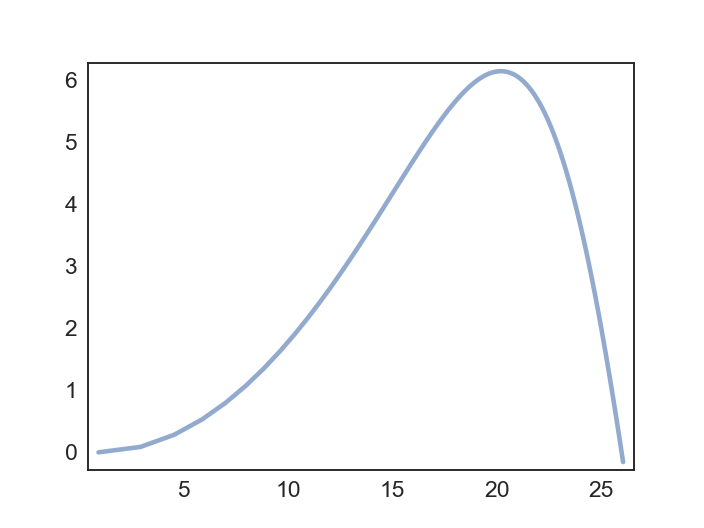

In [36]:
condition.set(omega = 0.00012)
condition.set(angle=0)
condition.set(duration=120)
system=run_corrected_simulation(condition,slope_func)
newfig()
plot(system.results.x,system.results.y)

In [58]:
#omegas = linspace(0,0.001,50)
#
#for omega in omegas:
#    condition.set(duration=10)
#    condition.set(omega=omega)
#    run_corrected_simulation(condition,slope_func)

<IPython.core.display.Javascript object>


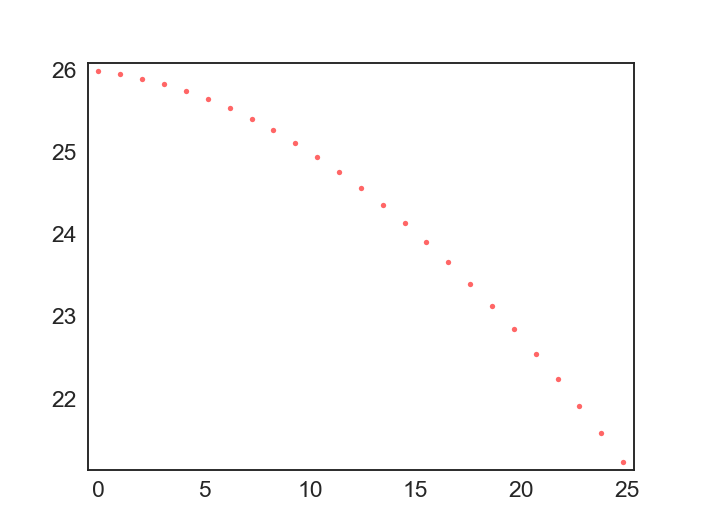

The simulation did not run long enough for the ball to hit the ground. Make the duration longer and try again.
The simulation did not run long enough for the ball to hit the ground. Make the duration longer and try again.
The simulation did not run long enough for the ball to hit the ground. Make the duration longer and try again.
The simulation did not run long enough for the ball to hit the ground. Make the duration longer and try again.
The simulation did not run long enough for the ball to hit the ground. Make the duration longer and try again.


In [37]:
angles = linspace(0,30,30)
newfig()
for angle in angles:
    condition.set(omega = 0.00012)
    condition.set(duration=120)
    condition.set(angle=angle)
    system = run_corrected_simulation(condition,slope_func)
    final_distance = interpolate_range(system.results)
    if final_distance > -1:
        plot(angle,final_distance,"r.")
    if final_distance < -1:
        plot(angle,final_distance,"r.")
    #newfig()
    #plot(system.results.x,system.results.y)

<IPython.core.display.Javascript object>


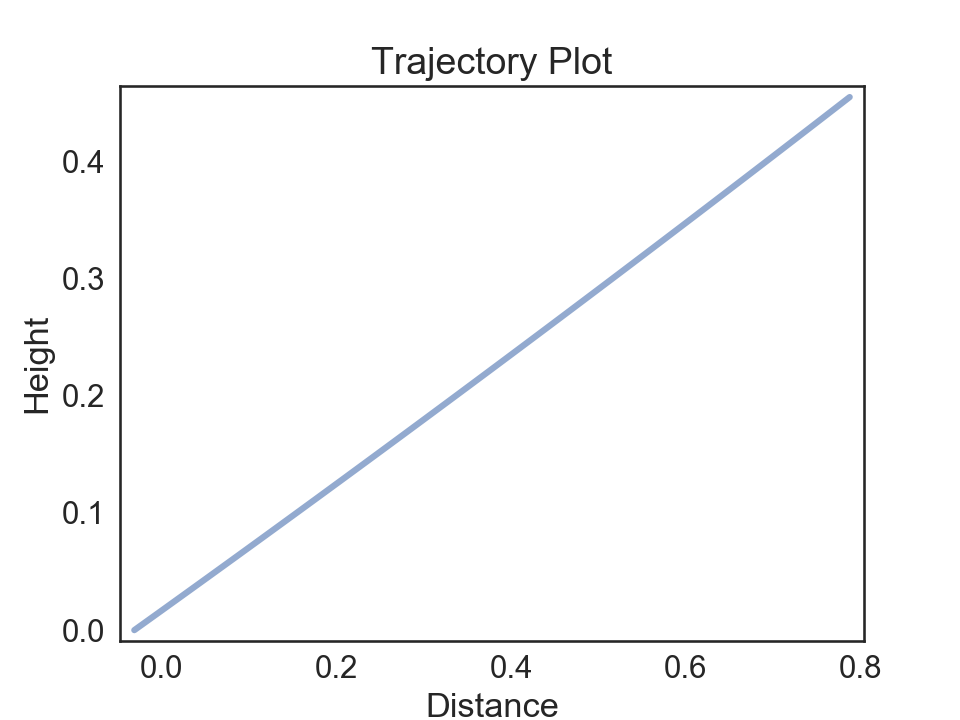

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
